In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

In [2]:
df_customer = pd.read_csv('olist_customers_dataset.csv')
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_order_item = pd.read_csv('olist_order_items_dataset.csv')
df_order_payment = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_order_dataset = pd.read_csv('olist_orders_dataset.csv')
df_product = pd.read_csv('olist_products_dataset.csv')
df_seller = pd.read_csv('olist_sellers_dataset.csv')
df_product_cat = pd.read_csv('product_category_name_translation.csv')

In [3]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
def missing_values_table(btc):
        # Total valeur manquante
        mis_val = btc.isnull().sum()
        
        # % valeur manquante
        mis_val_percent = 100 * btc.isnull().sum() / len(btc)
        
        # Crée un tableau avec res obtenue avant
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(btc.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(df_customer)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [54]:
res = df_customer['customer_state'].value_counts()

<Axes: >

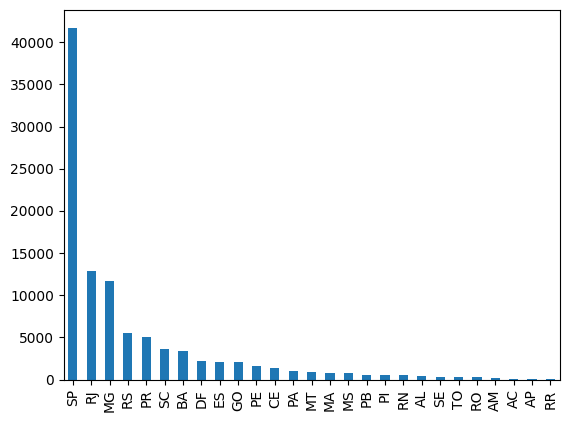

In [56]:
res.plot.bar()

In [59]:
df_order_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [19]:
df_merge_ = df_order_payment.merge(df_order_dataset, on='order_id')

In [27]:
df_merge_.drop(columns=['payment_sequential','payment_installments','payment_type','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],inplace=True)

In [84]:
df_merge_[['customer_id','order_purchase_timestamp']].value_counts()

customer_id                       order_purchase_timestamp
9af2372a1e49340278e7c1ef8d749f34  2017-04-20 12:45:34         29
92cd3ec6e2d643d4ebd0e3d6238f69e2  2017-06-07 12:05:10         26
b246eeed30b362c09d867b9e598bee51  2017-12-08 12:00:04         22
270c23a11d024a44c896d1894b261a83  2017-08-08 20:26:31         21
13aa59158da63ba0e93ec6ac2c07aacb  2017-09-23 14:56:45         19
                                                              ..
56f298c3c06de7ccbb65d45171e17d90  2017-10-17 08:37:59          1
56f1c0364602e45ee9f92b050d0e86dc  2018-02-12 10:17:11          1
56f1622201c6d8b17b1bc57367841538  2017-11-28 01:16:27          1
56f10439f7b396c7c7b5445357c22e9b  2018-06-16 14:18:32          1
ffffe8b65bbe3087b653a978c870db99  2017-09-29 14:07:03          1
Length: 99440, dtype: int64

In [85]:
df_merge_['Date'] = pd.to_datetime(df_merge_['order_purchase_timestamp']).dt.normalize()

In [82]:
# x.dt.strftime('%m/%d/%Y%H:%M:%S"')
x = pd.to_datetime(x).dt.date
x

0        2017-10-02
1        2018-07-24
2        2018-08-08
3        2017-11-18
4        2018-02-13
            ...    
99436    2017-03-09
99437    2018-02-06
99438    2017-08-27
99439    2018-01-08
99440    2018-03-08
Name: order_purchase_timestamp, Length: 99441, dtype: object

In [88]:
# date_merge = df_merge_[['customer_id','order_purchase_timestamp']].merge(x,)
df_merge_[['customer_id','order_purchase_timestamp','Date']]

,customer_id,order_purchase_timestamp,Date
0,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25
1,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26
2,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-12
3,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06
4,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17,2018-05-21
...,...,...,...
103881,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,2018-03-08
103882,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,2017-08-18
103883,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,2017-11-18
103884,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,2018-08-07


In [125]:
# Regrouper les ventes par région au sein du pays, notamment le brésil,  
x = df_seller[['seller_city','seller_state']]
res_seller = x.value_counts(subset=['seller_state','seller_city'])

seller_state  seller_city           
SP            sao paulo                 694
PR            curitiba                  124
RJ            rio de janeiro             93
MG            belo horizonte             66
SP            ribeirao preto             52
                                       ... 
RJ            tres rios                   1
              saquarema                   1
              sao pedro da aldeia         1
              santo antonio de padua      1
SC            camboriu                    1
Length: 636, dtype: int64

In [126]:
res_seller

seller_state  seller_city           
SP            sao paulo                 694
PR            curitiba                  124
RJ            rio de janeiro             93
MG            belo horizonte             66
SP            ribeirao preto             52
                                       ... 
RJ            tres rios                   1
              saquarema                   1
              sao pedro da aldeia         1
              santo antonio de padua      1
SC            camboriu                    1
Length: 636, dtype: int64